**Install and Import Libraries **

In [1]:
!pip install numpy pandas scikit-learn  xgboost==1.4.2 dask dask_ml tensorflow_decision_forests keras-tuner tensorflow keras



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.7/166.7 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 34.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Su

In [2]:
import numpy as np
import pandas as pd
from datetime import timedelta
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasRegressor
from scipy.stats import reciprocal
import dask.dataframe as dd
import dask.array as da
from dask.distributed import Client
from dask_ml.preprocessing import StandardScaler as DaskStandardScaler
from dask_ml.model_selection import GridSearchCV as DaskGridSearchCV
from dask_ml.model_selection import train_test_split as dask_train_test_split
import matplotlib.pyplot as plt
import tensorflow_decision_forests as tfdf
from sklearn.metrics import make_scorer

/usr/local/lib/python3.10/dist-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Final_full_ambulance_df.csv")

In [5]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame by the 'Date' column
df = df.sort_values('Date')

# Add a new column 'Year' extracted from 'Date'
df['Year'] = df['Date'].dt.year

In [6]:
# Assuming df is your DataFrame
df = df.rename(columns={
    "Count_in_last_1hour": "Count for this hour in last 1 hour",
    "Count_in_last_3hours": "Count for this hour in last 3 hours",
    "Count_in_last_6hours": "Count for this hour in last 6 hours",
    "Count_in_last_7days": "Count for this hour in last 7 days",
    "Count_in_last_14days": "Count for this hour in last 14 days",
    "Count_in_last_28days": "Count for this hour in last 28 days"
})


In [7]:
#Base df
df1 = df[["Unnamed: 0",'Station Area', 'Date', 'Time Of Call', 'Count', 'day_of_week', 'month', 'weekend', 'season']]

In [8]:
df2 = df[["Unnamed: 0",'Count for this hour in last 7 days','Count for this hour in last 14 days','Count for this hour in last 28 days','weekend','Date', 'Time Of Call', 'Count','Station Area', 'Public Holiday', ]]

**MLP Neural Network**

Epoch 1/50
3956/3956 [==============================] - 23s 5ms/step - loss: 0.2950 - val_loss: 0.2519 - lr: 0.0010
Epoch 2/50
3956/3956 [==============================] - 18s 4ms/step - loss: 0.2527 - val_loss: 0.2483 - lr: 0.0010
Epoch 3/50
3956/3956 [==============================] - 18s 5ms/step - loss: 0.2514 - val_loss: 0.2460 - lr: 0.0010
Epoch 4/50
3956/3956 [==============================] - 19s 5ms/step - loss: 0.2506 - val_loss: 0.2465 - lr: 0.0010
Epoch 5/50
3956/3956 [==============================] - 18s 5ms/step - loss: 0.2504 - val_loss: 0.2480 - lr: 0.0010
Epoch 6/50
3956/3956 [==============================] - 18s 5ms/step - loss: 0.2500 - val_loss: 0.2447 - lr: 0.0010
Epoch 7/50
3956/3956 [==============================] - 18s 5ms/step - loss: 0.2500 - val_loss: 0.2461 - lr: 0.0010
Epoch 8/50
3956/3956 [==============================] - 18s 4ms/step - loss: 0.2497 - val_loss: 0.2462 - lr: 0.0010
Epoch 9/50
3956/3956 [==============================] - 18s 5ms/step - l

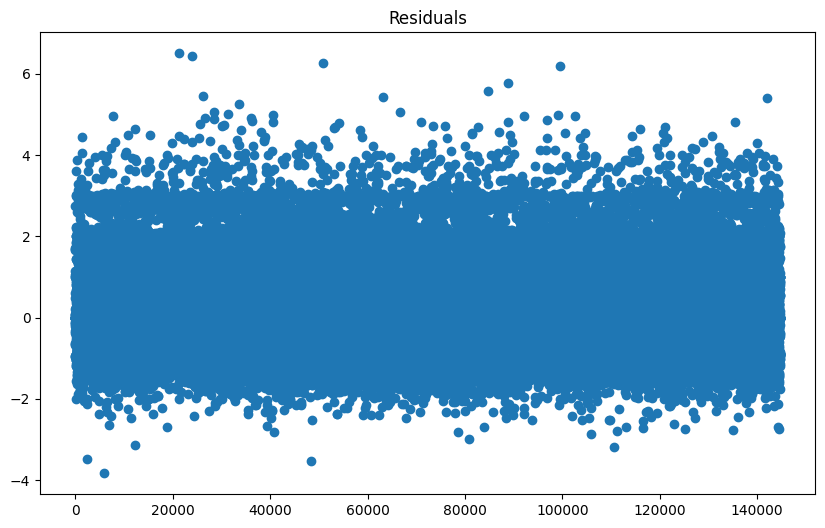

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers

# Load the data and preprocess
data = df2.copy()
data["Count"] = np.log1p(data["Count"])

# One-hot encoding for "Station Area"
data = pd.get_dummies(data, columns=["Station Area"])

# Feature selection
features = data.drop(columns=["Count", "Date", "Unnamed: 0"])
target = data["Count"]

# Time-based splitting
train_size = int(len(data) * 0.7)
valid_size = int(len(data) * 0.2)
test_size = len(data) - train_size - valid_size

train_features = features[:train_size]
valid_features = features[train_size:train_size + valid_size]
test_features = features[train_size + valid_size:]

train_target = target[:train_size]
valid_target = target[train_size:train_size + valid_size]
test_target = target[train_size + valid_size:]

# Scale features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
valid_features = scaler.transform(valid_features)
test_features = scaler.transform(test_features)

# Define the model
model = Sequential()
model.add(Dense(32, input_dim=train_features.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(loss='mae', optimizer=Adam())

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train the model
history = model.fit(
    train_features,
    train_target,
    validation_data=(valid_features, valid_target),
    epochs=50,
    batch_size=256,
    callbacks=[early_stopping, lr_scheduler]
)

# Predictions
train_preds = model.predict(train_features)
valid_preds = model.predict(valid_features)
test_preds = model.predict(test_features)

# Apply inverse transformation to predictions
train_preds = np.expm1(train_preds)
valid_preds = np.expm1(valid_preds)
test_preds = np.expm1(test_preds)

# Apply inverse transformation to targets
train_target_inv = np.expm1(train_target)
valid_target_inv = np.expm1(valid_target)
test_target_inv = np.expm1(test_target)

# R2 scores
train_r2 = r2_score(train_target_inv, train_preds)
valid_r2 = r2_score(valid_target_inv, valid_preds)
test_r2 = r2_score(test_target_inv, test_preds)

print(f'Train R2: {train_r2}')
print(f'Validation R2: {valid_r2}')
print(f'Test R2: {test_r2}')

# RMSE scores
train_rmse = np.sqrt(mean_squared_error(train_target_inv, train_preds))
valid_rmse = np.sqrt(mean_squared_error(valid_target_inv, valid_preds))
test_rmse = np.sqrt(mean_squared_error(test_target_inv, test_preds))

print(f'Train RMSE: {train_rmse}')
print(f'Validation RMSE: {valid_rmse}')
print(f'Test RMSE: {test_rmse}')

# MAE scores
train_mae = mean_absolute_error(train_target_inv, train_preds)
valid_mae = mean_absolute_error(valid_target_inv, valid_preds)
test_mae = mean_absolute_error(test_target_inv, test_preds)

print(f'Train MAE: {train_mae}')
print(f'Validation MAE: {valid_mae}')
print(f'Test MAE: {test_mae}')

# Check residuals
residuals = test_target_inv - test_preds.flatten()

plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals)
plt.title('Residuals')

plt.show()


**XGBoost**

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Convert the datasets into DMatrix format for XGBoost
dtrain = xgb.DMatrix(train_features, label=train_target)
dvalid = xgb.DMatrix(valid_features, label=valid_target)
dtest = xgb.DMatrix(test_features)

# Define the parameters for XGBoost
params = {
    'max_depth': [4, 6, 8],
    'min_child_weight': [1, 3, 5],
    'eta': [0.1, 0.3, 0.5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'objective': ['reg:squarederror'],
    'gpu_id': [0],
    'tree_method': ['gpu_hist']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=params, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV object to find the best hyperparameters
grid_search.fit(train_features, train_target)

# Get the best parameters and create the XGBoost model with the best hyperparameters
best_params = grid_search.best_params_
best_model = xgb.XGBRegressor(**best_params)

# Train the model
best_model.fit(train_features, train_target, eval_set=[(valid_features, valid_target)], early_stopping_rounds=10)

# Make predictions
train_preds = best_model.predict(train_features)
valid_preds = best_model.predict(valid_features)
test_preds = best_model.predict(test_features)

# Calculate evaluation metrics
train_rmse = mean_squared_error(train_target, train_preds, squared=False)
valid_rmse = mean_squared_error(valid_target, valid_preds, squared=False)
test_rmse = mean_squared_error(test_target, test_preds, squared=False)

train_mae = mean_absolute_error(train_target, train_preds)
valid_mae = mean_absolute_error(valid_target, valid_preds)
test_mae = mean_absolute_error(test_target, test_preds)

train_r2 = r2_score(train_target, train_preds)
valid_r2 = r2_score(valid_target, valid_preds)
test_r2 = r2_score(test_target, test_preds)

print("Train RMSE:", train_rmse)
print("Valid RMSE:", valid_rmse)
print("Test RMSE:", test_rmse)
print("Train MAE:", train_mae)
print("Valid MAE:", valid_mae)
print("Test MAE:", test_mae)
print("Train R2:", train_r2)
print("Valid R2:", valid_r2)
print("Test R2:", test_r2)


In [ ]:
# Print the best parameters
print("Best Parameters:")
for param, value in best_model.get_params().items():
    print(f"{param}: {value}")


Best Parameters:
objective: reg:squarederror
base_score: 0.5
booster: gbtree
colsample_bylevel: 1
colsample_bynode: 1
colsample_bytree: 0.8
gamma: 0
gpu_id: 0
importance_type: gain
interaction_constraints: 
learning_rate: 0.100000001
max_delta_step: 0
max_depth: 4
min_child_weight: 5
missing: nan
monotone_constraints: ()
n_estimators: 100
n_jobs: 2
num_parallel_tree: 1
random_state: 0
reg_alpha: 0
reg_lambda: 1
scale_pos_weight: 1
subsample: 0.8
tree_method: gpu_hist
validate_parameters: 1
verbosity: None
eta: 0.1


[0]	validation_0-rmse:0.47000
[1]	validation_0-rmse:0.45141
[2]	validation_0-rmse:0.43575
[3]	validation_0-rmse:0.42427
[4]	validation_0-rmse:0.41309
[5]	validation_0-rmse:0.40377
[6]	validation_0-rmse:0.39605
[7]	validation_0-rmse:0.39099
[8]	validation_0-rmse:0.38554
[9]	validation_0-rmse:0.38107
[10]	validation_0-rmse:0.37738
[11]	validation_0-rmse:0.37437
[12]	validation_0-rmse:0.37191
[13]	validation_0-rmse:0.36989
[14]	validation_0-rmse:0.36824
[15]	validation_0-rmse:0.36688
[16]	validation_0-rmse:0.36575
[17]	validation_0-rmse:0.36485
[18]	validation_0-rmse:0.36409
[19]	validation_0-rmse:0.36348
[20]	validation_0-rmse:0.36297
[21]	validation_0-rmse:0.36268
[22]	validation_0-rmse:0.36239
[23]	validation_0-rmse:0.36206
[24]	validation_0-rmse:0.36179
[25]	validation_0-rmse:0.36157
[26]	validation_0-rmse:0.36144
[27]	validation_0-rmse:0.36127
[28]	validation_0-rmse:0.36116
[29]	validation_0-rmse:0.36105
[30]	validation_0-rmse:0.36095
[31]	validation_0-rmse:0.36088
[32]	validation_0-

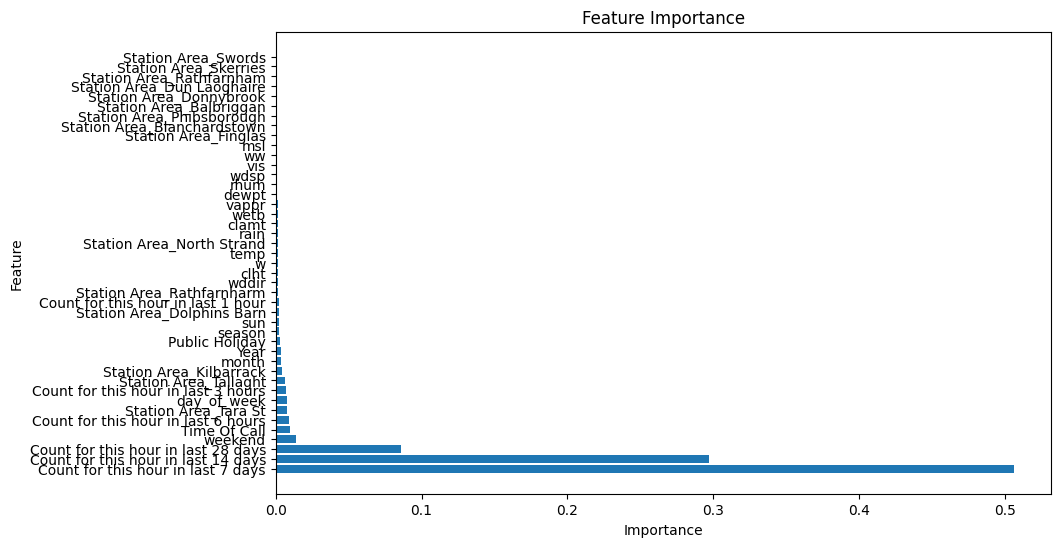

In [ ]:
#df2 results
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

# Load the data and preprocess
data = df.copy()
data["Count"] = np.log1p(data["Count"])

# One-hot encoding for "Station Area"
data = pd.get_dummies(data, columns=["Station Area"])

# Feature selection
features = data.drop(columns=["Count", "Date", "Unnamed: 0" ]) #"Unnamed: 0"
target = data["Count"]

# Time-based splitting
train_size = int(len(data) * 0.7)
valid_size = int(len(data) * 0.2)
test_size = len(data) - train_size - valid_size

train_features = features[:train_size]
valid_features = features[train_size:train_size + valid_size]
test_features = features[train_size + valid_size:]

train_target = target[:train_size]
valid_target = target[train_size:train_size + valid_size]
test_target = target[train_size + valid_size:]

# Scale features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
valid_features = scaler.transform(valid_features)
test_features = scaler.transform(test_features)

# Convert the datasets into DMatrix format for XGBoost
dtrain = xgb.DMatrix(train_features, label=train_target)
dvalid = xgb.DMatrix(valid_features, label=valid_target)
dtest = xgb.DMatrix(test_features)

# Define the parameters for XGBoost
params = {
    'max_depth': [4],
    'min_child_weight': [5],
    'eta': [0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'objective': ['reg:squarederror'],
    'gpu_id': [0],
    'tree_method': ['gpu_hist'],
    'n_jobs': [2],
    'n_estimators': [100],
    'random_state': [0]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=params, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV object to find the best hyperparameters
grid_search.fit(train_features, train_target)

# Get the best parameters and create the XGBoost model with the best hyperparameters
best_params = grid_search.best_params_
best_model = xgb.XGBRegressor(**best_params)

# Train the model
best_model.fit(train_features, train_target, eval_set=[(valid_features, valid_target)], early_stopping_rounds=10)

# Make predictions
train_preds = best_model.predict(train_features)
valid_preds = best_model.predict(valid_features)
test_preds = best_model.predict(test_features)

# Apply inverse transformation to predictions
train_preds = np.expm1(train_preds)
valid_preds = np.expm1(valid_preds)
test_preds = np.expm1(test_preds)

# Apply inverse transformation to targets
train_target_inv = np.expm1(train_target)
valid_target_inv = np.expm1(valid_target)
test_target_inv = np.expm1(test_target)

# R2 scores
train_r2 = r2_score(train_target_inv, train_preds)
valid_r2 = r2_score(valid_target_inv, valid_preds)
test_r2 = r2_score(test_target_inv, test_preds)

print(f'Train R2: {train_r2}')
print(f'Validation R2: {valid_r2}')
print(f'Test R2: {test_r2}')

# RMSE scores
train_rmse = np.sqrt(mean_squared_error(train_target_inv, train_preds))
valid_rmse = np.sqrt(mean_squared_error(valid_target_inv, valid_preds))
test_rmse = np.sqrt(mean_squared_error(test_target_inv, test_preds))

print(f'Train RMSE: {train_rmse}')
print(f'Validation RMSE: {valid_rmse}')
print(f'Test RMSE: {test_rmse}')

# MAE scores
train_mae = mean_absolute_error(train_target_inv, train_preds)
valid_mae = mean_absolute_error(valid_target_inv, valid_preds)
test_mae = mean_absolute_error(test_target_inv, test_preds)

print(f'Train MAE: {train_mae}')
print(f'Validation MAE: {valid_mae}')
print(f'Test MAE: {test_mae}')

# Feature importance
feature_importance = best_model.feature_importances_
feature_names = features.columns

# Create a dataframe of feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the dataframe by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance list
print(importance_df)

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


**Tensorflow_Decision_Forests**

In [ ]:
import tensorflow_decision_forests as tfdf
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = df1.copy()
data["Count"] = np.log1p(data["Count"])

# Encode categorical features
le = LabelEncoder()
data["Station Area"] = le.fit_transform(data["Station Area"])

# Feature selection
features = data.drop(columns=["Count", "Date", "Unnamed: 0"])
target = data["Count"]

# Time-based splitting
train_size = int(len(df) * 0.7)
valid_size = int(len(df) * 0.2)

train_features = features[:train_size]
valid_features = features[train_size:train_size + valid_size]
test_features = features[train_size + valid_size:]

train_target = target[:train_size]
valid_target = target[train_size:train_size + valid_size]
test_target = target[train_size + valid_size:]

# Convert the train and validation data to a TensorFlow dataset
train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(pd.concat([train_features, train_target], axis=1), task=tfdf.keras.Task.REGRESSION, label="Count")
valid_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(pd.concat([valid_features, valid_target], axis=1), task=tfdf.keras.Task.REGRESSION, label="Count")

# Define and train the model
model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)
model.compile(metrics=["mse"])
model.fit(train_dataset, validation_data=valid_dataset)

# Convert the test data to a TensorFlow dataset
test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(pd.concat([test_features, test_target], axis=1), task=tfdf.keras.Task.REGRESSION, label="Count")

# Make predictions
test_preds = model.predict(test_dataset)

# Convert the predictions and test_target back to the original scale
test_preds = np.expm1(test_preds).flatten()
test_target_inv = np.expm1(test_target)

# Calculate evaluation metrics
test_rmse = np.sqrt(mean_squared_error(test_target_inv, test_preds))
test_mae = mean_absolute_error(test_target_inv, test_preds)
test_r2 = r2_score(test_target_inv, test_preds)

print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)
print("Test R2:", test_r2)


Use /tmp/tmp_ws7givz as temporary training directory
Reading training dataset...
Training dataset read in 0:00:11.615730. Found 1012535 examples.
Reading validation dataset...
Num validation examples: tf.Tensor(289296, shape=(), dtype=int32)
Validation dataset read in 0:00:05.971810. Found 289296 examples.
Training model...
Model trained in 0:08:50.184175
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


145/145 [==============================] - 10s 69ms/step
Test RMSE: 0.8339424416680784
Test MAE: 0.5551373502903267
Test R2: 0.21592877810718192
